<a href="https://colab.research.google.com/github/katiacardoso/Selector_Hat/blob/main/SelectorHat_NaiveBayes2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes


In [1]:
from pickle import DEFAULT_PROTOCOL
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
# Definindo as características
caracteristicas = ["habilidade", "interesse", "personalidade"]

# Gerando alunos aleatórios
alunos = []
for _ in range(100000):
    habilidade = np.random.choice(["inteligente", "médio", "fraco"])
    interesse = np.random.choice(["leitura", "escrita", "música", "artes", "esportes", "ciência"])
    personalidade = np.random.choice(["extrovertido", "introvertido", "assertivo", "cooperativo"])
    casa = np.random.choice(["Grifinória", "Lufa-Lufa", "Corvinal", "Sonserina"])
    alunos.append({
        "habilidade": habilidade,
        "interesse": interesse,
        "personalidade": personalidade,
        "casa": casa,
    })

 # Convertendo o DataFrame em um array 2D
df = pd.DataFrame(alunos, columns=caracteristicas + ["casa"])

# Salvar o DataFrame como um arquivo CSV
df.to_csv('alunos.csv', index=False)

# Contando o número de dados de cada classe (altere para qual desejar)
contagem_de_classes = df["casa"].value_counts()

# Imprimindo o resultado
print(contagem_de_classes)


Sonserina     25216
Grifinória    25143
Lufa-Lufa     24974
Corvinal      24667
Name: casa, dtype: int64


In [3]:
from sklearn.preprocessing import OneHotEncoder


# Use get_dummies para One-Hot Encoding das colunas selecionadas
df = pd.get_dummies(df, columns=['habilidade', 'interesse', 'personalidade'])

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df.drop(['casa'], axis=1), df['casa'], test_size=0.2, random_state=42)

# Treinando o modelo
modelo_nb = GaussianNB()
modelo_nb.fit(X_train, y_train)

# Avaliando o modelo
precisao_treino = modelo_nb.score(X_train, y_train)
precisao_teste = modelo_nb.score(X_test, y_test)

print("Precisão no conjunto de treinamento:", precisao_treino)
print("Precisão no conjunto de teste:", precisao_teste)

#print("Casa prevista",previsao)

'''# Obtendo a probabilidade de erro
probabilidade_de_erro = 1 - modelo_nb.score(df[caracteristicas], df["casa"])
print("Probabilidade de erro:", probabilidade_de_erro)


# Obtendo a probabilidade de acerto
probabilidade_de_acerto = modelo_nb.score(df[caracteristicas], df["casa"])
print("Probabilidade de acerto:", probabilidade_de_acerto)'''

Precisão no conjunto de treinamento: 0.2565
Precisão no conjunto de teste: 0.2481


'# Obtendo a probabilidade de erro\nprobabilidade_de_erro = 1 - modelo_nb.score(df[caracteristicas], df["casa"])\nprint("Probabilidade de erro:", probabilidade_de_erro)\n\n\n# Obtendo a probabilidade de acerto\nprobabilidade_de_acerto = modelo_nb.score(df[caracteristicas], df["casa"])\nprint("Probabilidade de acerto:", probabilidade_de_acerto)'

se você não possui um conjunto de dados de teste separado e deseja avaliar o modelo usando os dados que você já possui, você pode utilizar técnicas como validação cruzada para avaliar o desempenho do modelo. Aqui está um exemplo de como você pode realizar a validação cruzada para calcular métricas como precisão, recall e F1-score

In [4]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score


# Realizando validação cruzada com 5 folds
scores = cross_val_score(modelo_nb, X_train, y_train, cv=5)

# Imprimindo as pontuações de validação cruzada
print("Pontuações de Validacão Cruzada:", scores)

# Calculando a média das pontuações de validação cruzada
media_precisao = scores.mean()

print("Média da Precisão na Validação Cruzada:", media_precisao)

Pontuações de Validacão Cruzada: [0.2495625 0.2485625 0.2505    0.250625  0.2493125]
Média da Precisão na Validação Cruzada: 0.2497125


In [5]:
# Faça previsões no conjunto de teste
y_pred = modelo_nb.predict(X_test)

# Gere o relatório de classificação
relatorio_classificacao = classification_report(y_test, y_pred)

# Imprima o relatório de classificação
print("Relatório de Classificação :\n", relatorio_classificacao)



Relatório de Classificação :
               precision    recall  f1-score   support

    Corvinal       0.24      0.36      0.29      4845
  Grifinória       0.25      0.28      0.27      5039
   Lufa-Lufa       0.25      0.13      0.17      5054
   Sonserina       0.25      0.22      0.23      5062

    accuracy                           0.25     20000
   macro avg       0.25      0.25      0.24     20000
weighted avg       0.25      0.25      0.24     20000



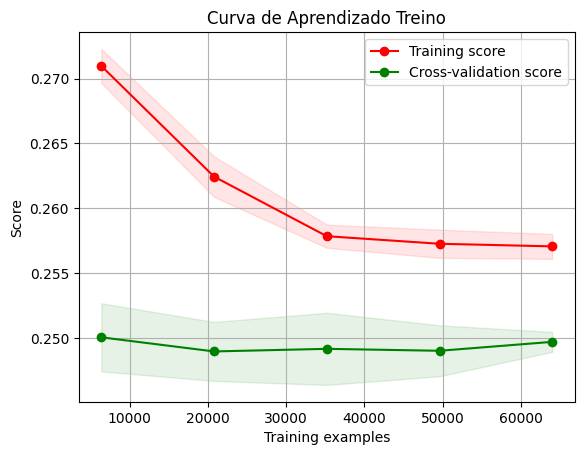

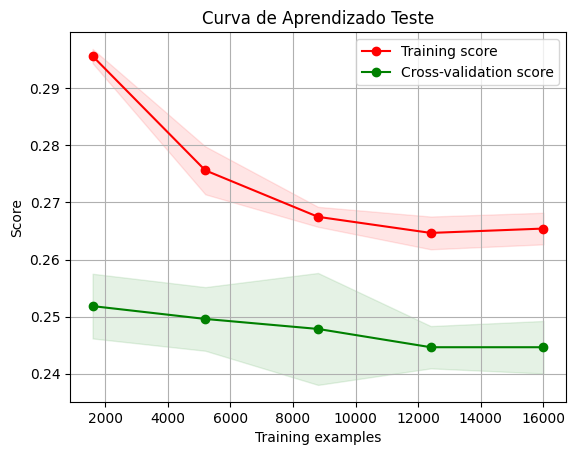

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve

# Função para plotar a curva de aprendizado
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plotando a curva de aprendizado
plot_learning_curve(modelo_nb, "Curva de Aprendizado Treino", X_train, y_train, cv=5)
plt.show()

# Plotando a curva de aprendizado
plot_learning_curve(modelo_nb, "Curva de Aprendizado Teste", X_test, y_test, cv=5)
plt.show()


Testar:
- Regressão Logística
- Random Forest
- SVM (Support Vector Machine)
- Gradient Boosting


melhoria: testar o novo aluno e colocar uma visualização das probabilidades

# Random Forest

**Conversão para Variáveis Dummy** - > converte as variáveis categóricas em variáveis dummy. Isso cria representações numéricas para as categorias, tornando-as adequadas para os algoritmos de machine learning

**Variáveis de Entrada (também conhecidas como características ou features)** -> "habilidade", "interesse" e "personalidade"  

**Variável de saída (ou rótulo)** -> "casa" (à qual a casa o aluno pertence, como "Grifinória", "Lufa-Lufa", etc.)


Antes de alimentar essas características em um modelo de machine learning, é comum transformar variáveis categóricas (como "habilidade" ou "interesse") em variáveis dummy ou one-hot encoding. Isso é feito para que os algoritmos de machine learning possam trabalhar com essas características.

No código, foi utilizado *pd.get_dummies()* para converter as características categóricas em variáveis *dummy*. Após essa conversão, é possível ter um conjunto de colunas que representa as características de forma binária (1 ou 0, indicando a presença ou ausência de uma determinada categoria)




In [26]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Definindo as características
caracteristicas = ["habilidade", "interesse", "personalidade"]

# Gerando 100 alunos aleatórios
alunos_rf = []
for _ in range(100000):
    habilidade = np.random.choice(["inteligente", "médio", "fraco"])
    interesse = np.random.choice(["leitura", "escrita", "música", "artes", "esportes", "ciência"])
    personalidade = np.random.choice(["extrovertido", "introvertido", "assertivo", "cooperativo"])
    casa = np.random.choice(["Grifinória", "Lufa-Lufa", "Corvinal", "Sonserina"])
    alunos_rf.append({
        "habilidade": habilidade,
        "interesse": interesse,
        "personalidade": personalidade,
        "casa": casa,
    })

# Criando o DataFrame
alunos_rf = pd.DataFrame(alunos_rf)

# Salvar o DataFrame como um arquivo CSV
df.to_csv('alunos_rf.csv', index=False)

# Convertendo as características categóricas em variáveis dummy
alunos_rf = pd.get_dummies(alunos_rf, columns=caracteristicas, drop_first=True)

# Verificando os nomes das colunas dummy
print(alunos_rf.columns)

# Separando as variáveis independentes (X) e a variável dependente (y)
X = alunos_rf[['habilidade_inteligente', 'habilidade_médio',
       'interesse_ciência', 'interesse_escrita', 'interesse_esportes',
       'interesse_leitura', 'interesse_música', 'personalidade_cooperativo',
       'personalidade_extrovertido', 'personalidade_introvertido']]  # Variáveis independentes (características dos alunos)
y = alunos_rf['casa']  # Variável dependente (casa à qual o aluno pertence)

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo Random Forest
modelo_rf = RandomForestClassifier(n_estimators=150, random_state=42)
modelo_rf.fit(X_train, y_train)

# Avaliando a precisão do modelo no conjunto de teste
y_pred = modelo_rf.predict(X_test)
precisao = accuracy_score(y_test, y_pred)
print(f'Precisão do modelo: {precisao}')

Index(['casa', 'habilidade_fraco', 'habilidade_inteligente',
       'habilidade_médio', 'interesse_artes', 'interesse_ciência',
       'interesse_escrita', 'interesse_esportes', 'interesse_leitura',
       'interesse_música', 'personalidade_assertivo',
       'personalidade_cooperativo', 'personalidade_extrovertido',
       'personalidade_introvertido'],
      dtype='object')
Precisão do modelo: 0.25435


In [27]:
# Características do novo aluno
novo_aluno = {
    "habilidade": "médio",
    "interesse": "leitura",
    "personalidade": "extrovertido",
}

# Convertendo as características do novo aluno em variáveis dummy
novo_aluno_df = pd.DataFrame({
    "habilidade": [novo_aluno["habilidade"]],
    "interesse": [novo_aluno["interesse"]],
    "personalidade": [novo_aluno["personalidade"]]
})

# Convertendo as características categóricas em variáveis dummy usando as mesmas categorias do conjunto de treino
novo_aluno_df = pd.get_dummies(novo_aluno_df, columns=["habilidade", "interesse", "personalidade"])

# Certificando-se de que o novo aluno possui todas as colunas necessárias, adicionando colunas ausentes se necessário
colunas_necessarias = set(X.columns)
colunas_novos_alunos = set(novo_aluno_df.columns)
colunas_a_adicionar = colunas_necessarias - colunas_novos_alunos
for coluna in colunas_a_adicionar:
    novo_aluno_df[coluna] = 0

# Reordenando as colunas para que estejam na mesma ordem que o conjunto de treino
novo_aluno_df = novo_aluno_df[X.columns]

# Realizando a previsão da casa para o novo aluno usando o modelo treinado
previsao_casa = modelo_rf.predict(novo_aluno_df)
print(f'A casa prevista para o novo aluno é: {previsao_casa[0]}')


A casa prevista para o novo aluno é: Sonserina


In [51]:
# Fazendo previsões para o conjunto de teste
y_pred = modelo_rf.predict(X_test)

# Contador para limitar a exibição aos primeiros 5 erros
contador_erros = 0

# Exibindo até 5 erros específicos
for i in range(len(y_test)):
    if y_test.iloc[i] != y_pred[i]:
        # Exibindo rótulo verdadeiro e previsão
        print(f"Verdadeiro: {y_test.iloc[i]}, Previsto: {y_pred[i]}")
        contador_erros += 1
        if contador_erros >= 5:
            break

# Gerando o relatório de classificação
relatorio = classification_report(y_test, y_pred)

# Imprimindo o relatório
print("\n Relatório de Classificação:")
print(relatorio)

Verdadeiro: Sonserina, Previsto: Lufa-Lufa
Verdadeiro: Corvinal, Previsto: Lufa-Lufa
Verdadeiro: Lufa-Lufa, Previsto: Sonserina
Verdadeiro: Sonserina, Previsto: Lufa-Lufa
Verdadeiro: Grifinória, Previsto: Sonserina

 Relatório de Classificação:
              precision    recall  f1-score   support

    Corvinal       0.26      0.27      0.27      5042
  Grifinória       0.26      0.20      0.23      5034
   Lufa-Lufa       0.25      0.24      0.24      4922
   Sonserina       0.25      0.30      0.28      5002

    accuracy                           0.25     20000
   macro avg       0.25      0.25      0.25     20000
weighted avg       0.25      0.25      0.25     20000



In [29]:
from sklearn.metrics import confusion_matrix
matriz_confusao = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(matriz_confusao)

Matriz de Confusão:
[[1370  979 1172 1521]
 [1336 1011 1205 1482]
 [1246  961 1184 1531]
 [1339  958 1183 1522]]


In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score
precisao = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precisão:", precisao)
print("Recall:", recall)
print("F1-Score:", f1)

Precisão: 0.2546511073562417
Recall: 0.25435
F1-Score: 0.2528949954582627


In [53]:
# Realizando a validação cruzada com 5 folds
scores = cross_val_score(modelo_rf, X, y, cv=5, scoring='accuracy')

# Imprimindo a precisão média obtida durante a validação cruzada
print("Precisão Média: ", np.mean(scores))

Precisão Média:  0.25284000000000006


In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definindo os hiperparâmetros que você deseja ajustar
parametros = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}


# Criando o objeto GridSearchCV com o modelo, os parâmetros e a métrica de avaliação (por exemplo, 'accuracy' para classificação)
grid_search = GridSearchCV(estimator=modelo_rf, param_grid=parametros, cv=5, scoring='accuracy')

# Realizando a busca em grade nos dados
grid_search.fit(X, y)

# Imprimindo os melhores hiperparâmetros encontrados
print("Melhores Hiperparâmetros: ", grid_search.best_params_)

# Imprimindo a melhor precisão encontrada durante a busca em grade
print("Melhor Precisão: ", grid_search.best_score_)


Melhores Hiperparâmetros:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Melhor Precisão:  0.25247


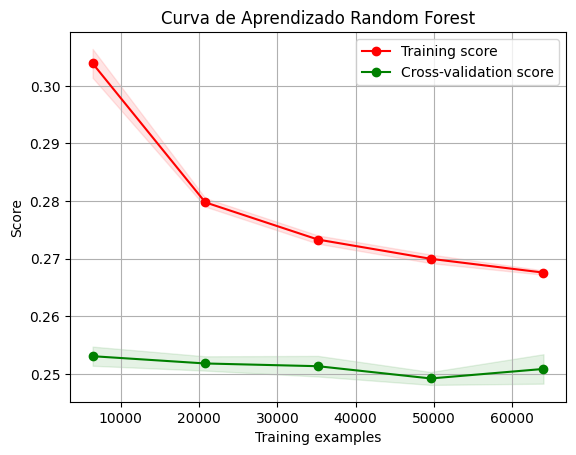

In [52]:

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plotando a curva de aprendizado
plot_learning_curve(modelo_rf, "Curva de Aprendizado Random Forest", X_train, y_train, cv=5)
plt.show()


# Gradient Boosting

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Separando as variáveis independentes (X) e a variável dependente (y)
X = alunos_rf[['habilidade_inteligente', 'habilidade_médio',
       'interesse_ciência', 'interesse_escrita', 'interesse_esportes',
       'interesse_leitura', 'interesse_música', 'personalidade_cooperativo',
       'personalidade_extrovertido', 'personalidade_introvertido']]  # Variáveis independentes (características dos alunos)
y = alunos_rf['casa']  # Variável dependente (casa à qual o aluno pertence)


# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo Gradient Boosting
modelo_gb = GradientBoostingClassifier(n_estimators=50, learning_rate=0.05, random_state=42)
modelo_gb.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = modelo_gb.predict(X_test)

# Avaliando a precisão do modelo
precisao = accuracy_score(y_test, y_pred)
print(f'Precisão do modelo: {precisao}')

Precisão do modelo: 0.25015


# Rede Neural

In [61]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Separando as variáveis independentes (X) e a variável dependente (y)
X = alunos_rf[['habilidade_inteligente', 'habilidade_médio',
       'interesse_ciência', 'interesse_escrita', 'interesse_esportes',
       'interesse_leitura', 'interesse_música', 'personalidade_cooperativo',
       'personalidade_extrovertido', 'personalidade_introvertido']]  # Variáveis independentes (características dos alunos)
y = alunos_rf['casa']  # Variável dependente (casa à qual o aluno pertence)

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

'''# Criando e treinando o modelo de rede neural
modelo_nn = MLPClassifier(hidden_layer_sizes=(500, 250), max_iter=800, random_state=42)
modelo_nn.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = modelo_nn.predict(X_test)

# Avaliando a precisão do modelo
precisao = accuracy_score(y_test, y_pred)
print(f'Precisão do modelo: {precisao}')'''


Precisão do modelo: 0.2496


In [62]:
# Definindo os hiperparâmetros que você deseja ajustar
parametros = {
    'hidden_layer_sizes': [(50, 50), (100, 50), (100, 100)],
    'max_iter': [500, 1000],
    'activation': ['relu', 'tanh'],
}

# Criando o modelo de rede neural
modelo_nn = MLPClassifier(random_state=42)

# Criando o objeto GridSearchCV com o modelo, os parâmetros e a métrica de avaliação
grid_search = GridSearchCV(estimator=modelo_nn, param_grid=parametros, cv=5, scoring='accuracy')

# Realizando a busca em grade nos dados
grid_search.fit(X_train, y_train)

# Imprimindo os melhores hiperparâmetros encontrados
print("Melhores Hiperparâmetros: ", grid_search.best_params_)

# Imprimindo a melhor precisão encontrada durante a busca em grade
print("Melhor Precisão: ", grid_search.best_score_)

# Fazendo previsões usando o modelo com os melhores hiperparâmetros
modelo_final = grid_search.best_estimator_
y_pred = modelo_final.predict(X_test)

# Avaliando a precisão do modelo no conjunto de teste
precisao_teste = accuracy_score(y_test, y_pred)
print(f'Precisão no conjunto de teste: {precisao_teste}')

Melhores Hiperparâmetros:  {'activation': 'tanh', 'hidden_layer_sizes': (50, 50), 'max_iter': 500}
Melhor Precisão:  0.25145
Precisão no conjunto de teste: 0.2518
